# Youtube Comment Spam Detection

In [9]:
#combine all files into one df
import pandas as pd
import os
import warnings 
warnings.filterwarnings('ignore')

def load_files_to_df(folder):
    #store inidividual dfs
    dfs = []

    for filename in os.listdir(folder):
        if filename.endswith('csv'):
            file_path = os.path.join(folder, filename)

            df = pd.read_csv(file_path)
            dfs.append(df)
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

In [126]:
folder = 'youtube-spam-collection-v1'
df = load_files_to_df(folder)
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [127]:
df.shape

(1586, 5)

In [115]:
df.CLASS.value_counts()

CLASS
1    831
0    755
Name: count, dtype: int64

This data has comments from 4 different youtube comment sections and is classed as spam (1) or not spam. I have a 5th data set to apply spam detector to measure success of filter.

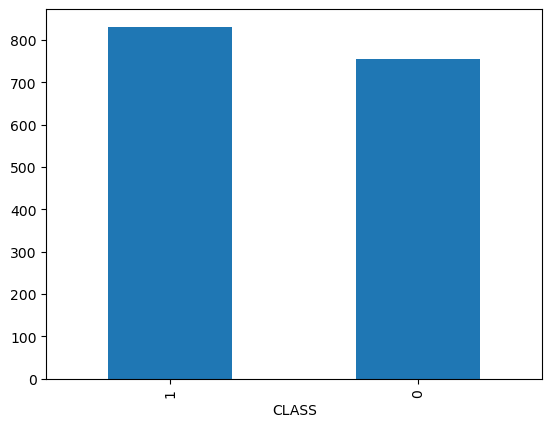

In [21]:
import matplotlib.pyplot
df.CLASS.value_counts().plot(kind='bar');

Feature Engineer Process 
1. Only need comment and class
2. Split into train and test
3. Use feature vectorisation to convert comment into vector
4. build classification model
5. hypertune and cross-validate

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def feature_process(x):
    X = x.CONTENT
    y = x.CLASS
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.25, random_state=42)
    cv = CountVectorizer()
    #turn comments into vectors
    Xtrain = cv.fit_transform(Xtrain)
    Xtest = cv.transform(Xtest)
 
    return Xtrain, Xtest, ytrain, ytest, cv

In [129]:
#apply feature process to df

Xtrain, Xtest, ytrain, ytest, cv = feature_process(df)

In [130]:
Xtrain.shape

(1189, 3125)

In [131]:
#build classification models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(Xtrain,ytrain)

pred = lr.predict(Xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       187
           1       0.97      0.93      0.95       210

    accuracy                           0.95       397
   macro avg       0.95      0.95      0.95       397
weighted avg       0.95      0.95      0.95       397



In [132]:
#build svm models
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel='linear')
svm.fit(Xtrain,ytrain)

pred = svm.predict(Xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       187
           1       0.97      0.94      0.95       210

    accuracy                           0.95       397
   macro avg       0.95      0.95      0.95       397
weighted avg       0.95      0.95      0.95       397



In [133]:
#build a bayes classification
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(Xtrain,ytrain)

pred = nb.predict(Xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       187
           1       0.98      0.85      0.91       210

    accuracy                           0.91       397
   macro avg       0.92      0.92      0.91       397
weighted avg       0.92      0.91      0.91       397



In [134]:
#build random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain,ytrain)

pred = rf.predict(Xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       187
           1       0.98      0.94      0.96       210

    accuracy                           0.96       397
   macro avg       0.96      0.96      0.96       397
weighted avg       0.96      0.96      0.96       397



In [135]:
#build random forest classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(Xtrain,ytrain)

pred = mlp.predict(Xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       187
           1       0.97      0.93      0.95       210

    accuracy                           0.95       397
   macro avg       0.95      0.95      0.95       397
weighted avg       0.95      0.95      0.95       397



In [136]:
#use vote stack
from sklearn.ensemble import VotingClassifier

estimators = ([
    ('lr',lr),
    ('rf',rf),
    ('svm',svm)
])
vc = VotingClassifier(estimators = estimators, voting= 'hard')
vc.fit(Xtrain,ytrain)

pred = vc.predict(Xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       187
           1       0.97      0.94      0.95       210

    accuracy                           0.95       397
   macro avg       0.95      0.95      0.95       397
weighted avg       0.95      0.95      0.95       397



In [138]:
#use  stack
from sklearn.ensemble import StackingClassifier

estimators = ([
    ('lr',lr),
    ('rf',rf),
    ('svm',svm)
])
sc = VotingClassifier(estimators = estimators)
sc.fit(Xtrain,ytrain)

pred = sc.predict(Xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       187
           1       0.97      0.94      0.95       210

    accuracy                           0.95       397
   macro avg       0.95      0.95      0.95       397
weighted avg       0.95      0.95      0.95       397



## Hypertune and cross-validate

In [140]:
#cross validate and hypertune
from sklearn.model_selection import RandomizedSearchCV

parameter_grid = dict(
    lr__penalty = ['l1','l2', 'elasticnet',None],
    lr__solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
    lr__C = [0.1,0.5,1,2],
    lr__max_iter = [100,500,1000],
    rf__n_estimators = [50,100,200],
    rf__criterion = ['gini','entropy', 'log_loss'],
    rf__max_features = ['sqrt','log2',None],
    svm__C = [0.5,1,2],
    svm__kernel = ['linear','rbf','poly'],
    svm__gamma = [1,5,10]
)


search = RandomizedSearchCV(vc, parameter_grid, random_state =42, cv=5,
                            scoring = 'accuracy')
search.fit(Xtrain,ytrain)

pred = search.predict(Xtest)

print(search.best_estimator_)
print(classification_report(ytest,pred))
                        

C:\Users\natha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\natha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\natha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\natha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\natha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\natha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalt

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_features=None,
                                                     random_state=42)),
                             ('svm', SVC(C=0.5, gamma=1, kernel='linear'))])
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       187
           1       0.97      0.94      0.96       210

    accuracy                           0.95       397
   macro avg       0.95      0.96      0.95       397
weighted avg       0.96      0.95      0.95       397



### Use model on unseen data

In [141]:
test = pd.read_csv('Youtube05-Shakira.csv')
test.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [148]:
#apply feature_process

X = cv.transform(test.CONTENT)

In [149]:
X.shape

(370, 3125)

In [144]:
y1 = test.CLASS

In [145]:
test_pred = search.predict(X)

In [146]:
#compare accuracy
print(classification_report(y1, test_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       196
           1       1.00      0.84      0.92       174

    accuracy                           0.93       370
   macro avg       0.94      0.92      0.93       370
weighted avg       0.94      0.93      0.93       370



In [180]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import joblib  # For loading the model

# Load your pre-trained model and vectorizer
model = search

# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Spam Detector"),
    dcc.Textarea(
        id='comment-input',
        value='',
        style={'width': '100%', 'height': 100}
    ),
    html.Button('Check Comment', id='submit-button', n_clicks=0),
    html.Div(id='result-output')
])

@app.callback(
    Output('result-output', 'children'),
    Input('submit-button', 'n_clicks'),
    Input('comment-input', 'value')
)
def update_output(n_clicks, comment):
    if n_clicks > 0:
        # Preprocess the comment
        X = cv.transform([comment])
        prediction = model.predict(X)[0]
        return f'Result: {"Spam" if prediction == 1 else "Not Spam"}'
    return 'Enter a comment and click "Check Comment"'

if __name__ == '__main__':
    app.run_server(debug=True, port=8050)
